In [1]:
from numpy.core.numeric import argwhere
%cd ..

/Users/bezha/PycharmProjects/TripleStreams


In [2]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset
import matplotlib.pyplot as plt
# suppress matplotlib warnings
import logging
import matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)

Could not import fluidsynth. AUDIO rendering will not work.
Holoviews not installed. Please install holoviews to be able to generate heatmaps.


In [3]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',

    'dataset_files': ['01_candombe_four_voices.pkl.bz2',
                      '02_elbg_both_flattened_left_right.pkl.bz2',
                      '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
                      '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
                      '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
                      '06_lmd_bass_brass_drum_percussion.pkl.bz2',
                      '07_lmd_bass_brass_drum_percussive.pkl.bz2',
                      '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
                      '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
                      '10_lmd_bass_brass_guitar_piano.pkl.bz2',
                      '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
                      '12_lmd_bass_brass_percussion_piano.pkl.bz2',
                      '13_lmd_bass_brass_percussive_piano.pkl.bz2',
                      '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
                      '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
                      '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
                      '17_lmd_bass_drum_percussion_piano.pkl.bz2',
                      '18_lmd_bass_drum_percussive_piano.pkl.bz2',
                      '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
                      '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
                      '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
                      '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
                      '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
                      '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
                      '25_lmd_brass_drum_guitar_piano.pkl.bz2',
                      '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
                      '27_lmd_brass_drum_percussion_piano.pkl.bz2',
                      '28_lmd_brass_drum_percussive_piano.pkl.bz2',
                      '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
                      '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
                      '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
                      '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
                      '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
                      '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
                      '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
                      '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
                      '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
                      '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
                      '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'],

    'max_len': 32,

    'n_encoding_control_tokens':
        [
            None                                # continuos values
        ],
    'encoding_control_keys':
        [
            'Structural Similarity Distance',
        ],

    'n_decoding_control_tokens':
        [
            None,
            None,
            None,
            None,
            None
        ],
    'decoding_control_keys':
        [
            'Total Out Hits',
            'Output Step Density',
            'Stream 1 Relative Density',
            'Stream 2 Relative Density',
            'Stream 3 Relative Density',
        ],
}


is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False                                #<---  Set to True to print dataset loading logs
    )

In [4]:
from data import FlexControlGroove2TripleStream2BarDataset

features_all = FlexControlGroove2TripleStream2BarDataset.extract_features_dict(
    {
        "input_hvos": dataset.input_grooves.cpu().numpy(),
        "output_hvos": dataset.output_streams.cpu().numpy(),
        "flat_out_hvos": dataset.flat_output_streams.cpu().numpy(),
    },
)

In [5]:
for key, value in features_all.items():
    print(key) if "mass" in key.lower() else None

Hit Center of Mass | Input | Magnitude
Hit Center of Mass | Input | Angle
Hit Center of Mass | Output | Magnitude
Hit Center of Mass | Output | Angle
Hit Center of Mass | Diff | Magnitude
Hit Center of Mass | Diff | Angle
Velocity Center of Mass | Input | Magnitude
Velocity Center of Mass | Input | Angle
Velocity Center of Mass | Output | Magnitude
Velocity Center of Mass | Output | Angle
Velocity Center of Mass | Diff | Magnitude
Velocity Center of Mass | Diff | Angle
Offset Center of Mass | Input | Magnitude
Offset Center of Mass | Input | Angle
Offset Center of Mass | Output | Magnitude
Offset Center of Mass | Output | Angle
Offset Center of Mass | Diff | Magnitude
Offset Center of Mass | Diff | Angle
HVO Center of Mass | Input | Magnitude
HVO Center of Mass | Input | Angle
HVO Center of Mass | Output | Magnitude
HVO Center of Mass | Output | Angle
HVO Center of Mass | Diff | Magnitude
HVO Center of Mass | Diff | Angle


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


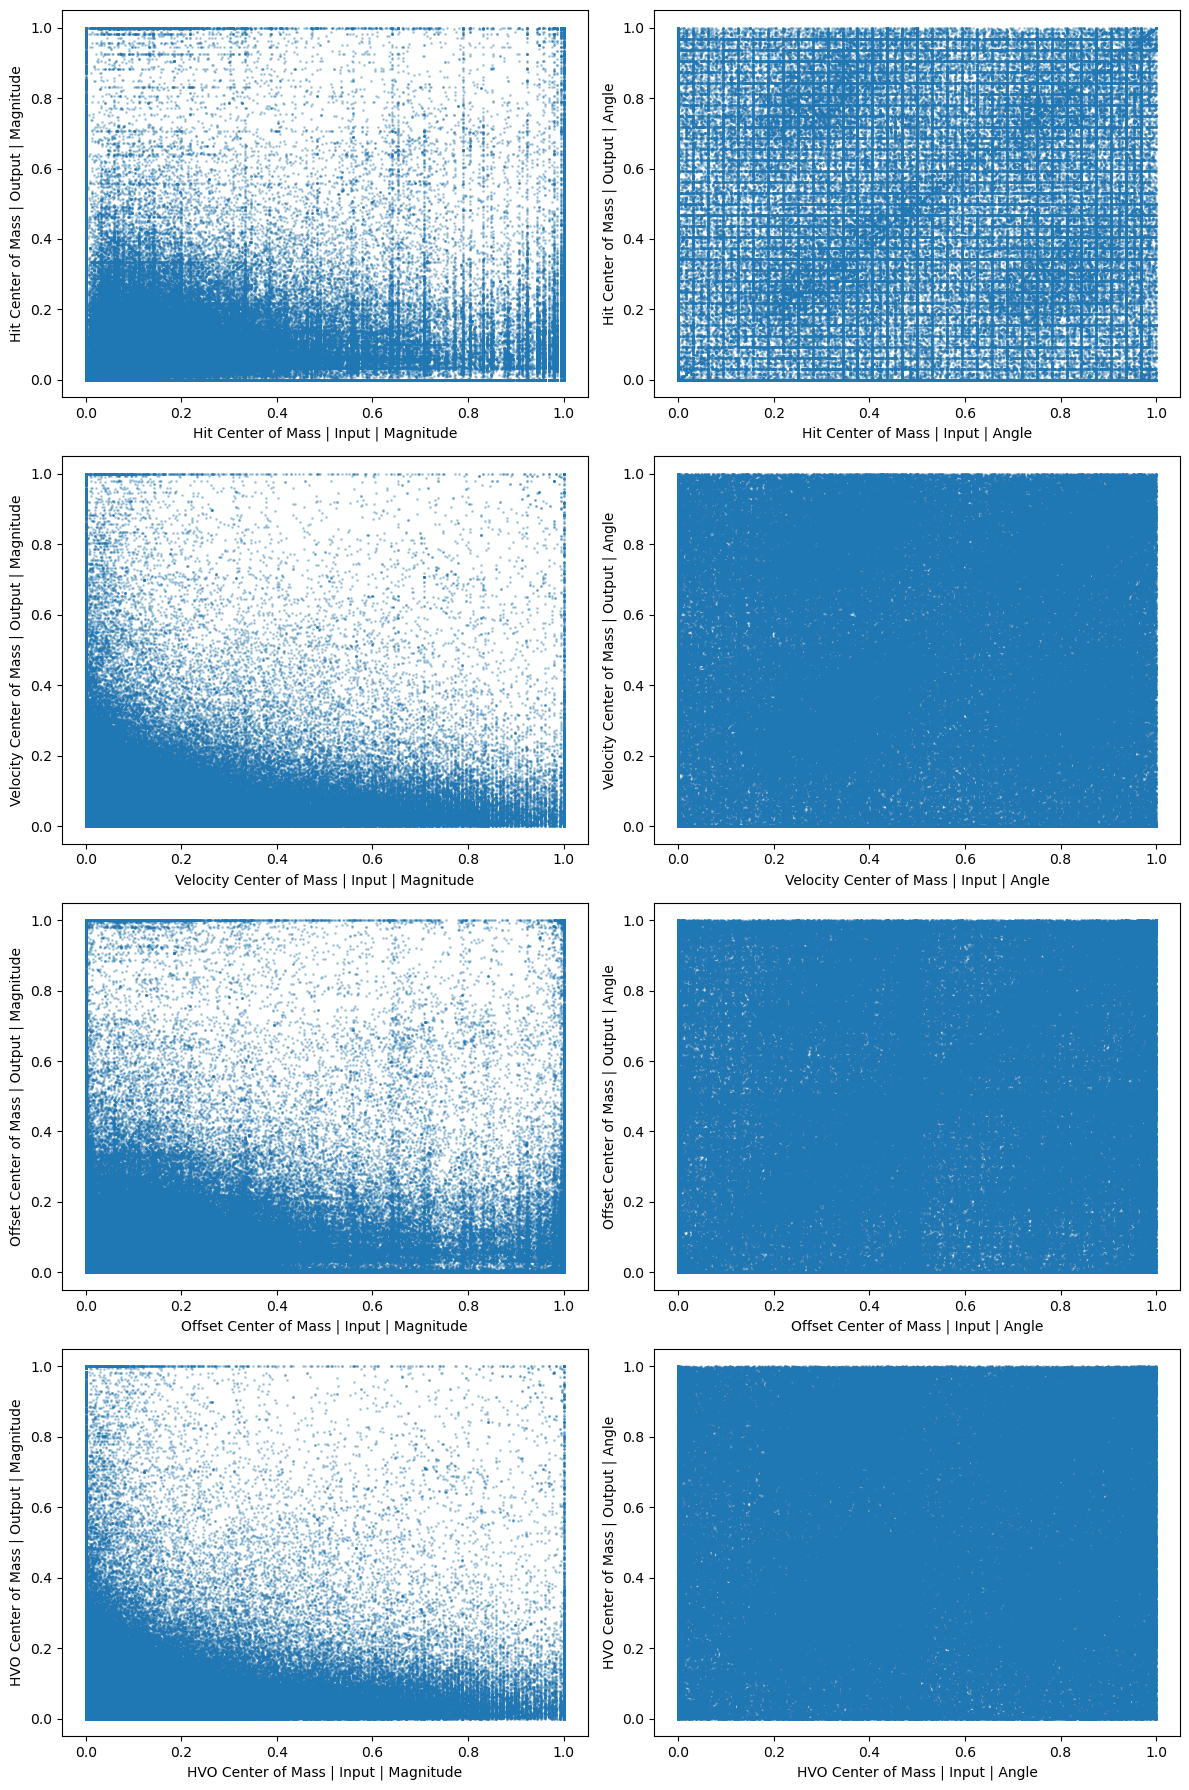

In [6]:
# "Hit Center of Mass | Input | Magnitude" vs "Hit Center of Mass | Output | Magnitude"

feature_pairs = [
    ("Hit Center of Mass | Input | Magnitude", "Hit Center of Mass | Output | Magnitude"),
    ("Hit Center of Mass | Input | Angle", "Hit Center of Mass | Output | Angle"),
    ("Velocity Center of Mass | Input | Magnitude", "Velocity Center of Mass | Output | Magnitude"),
    ("Velocity Center of Mass | Input | Angle", "Velocity Center of Mass | Output | Angle"),
    ("Offset Center of Mass | Input | Magnitude", "Offset Center of Mass | Output | Magnitude"),
    ("Offset Center of Mass | Input | Angle", "Offset Center of Mass | Output | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Output | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Output | Angle")
]

# plot 2 per row
fig, axs = plt.subplots(4, 2, figsize=(12, 18))
for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[i // 2, i % 2]
    ax.scatter(features_all[k1], features_all[k2], alpha=0.05, s=1)
    ax.set_xlabel(k1)
    ax.set_ylabel(k2)
plt.tight_layout()
plt.show()






/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_69313/3456495701.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("inferno").copy()
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3431e5490>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35afbc610>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b818f40>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b8488e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b8732b0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b89ad30>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b8c8790>
DEBUG:matplotlib.colorbar:locator

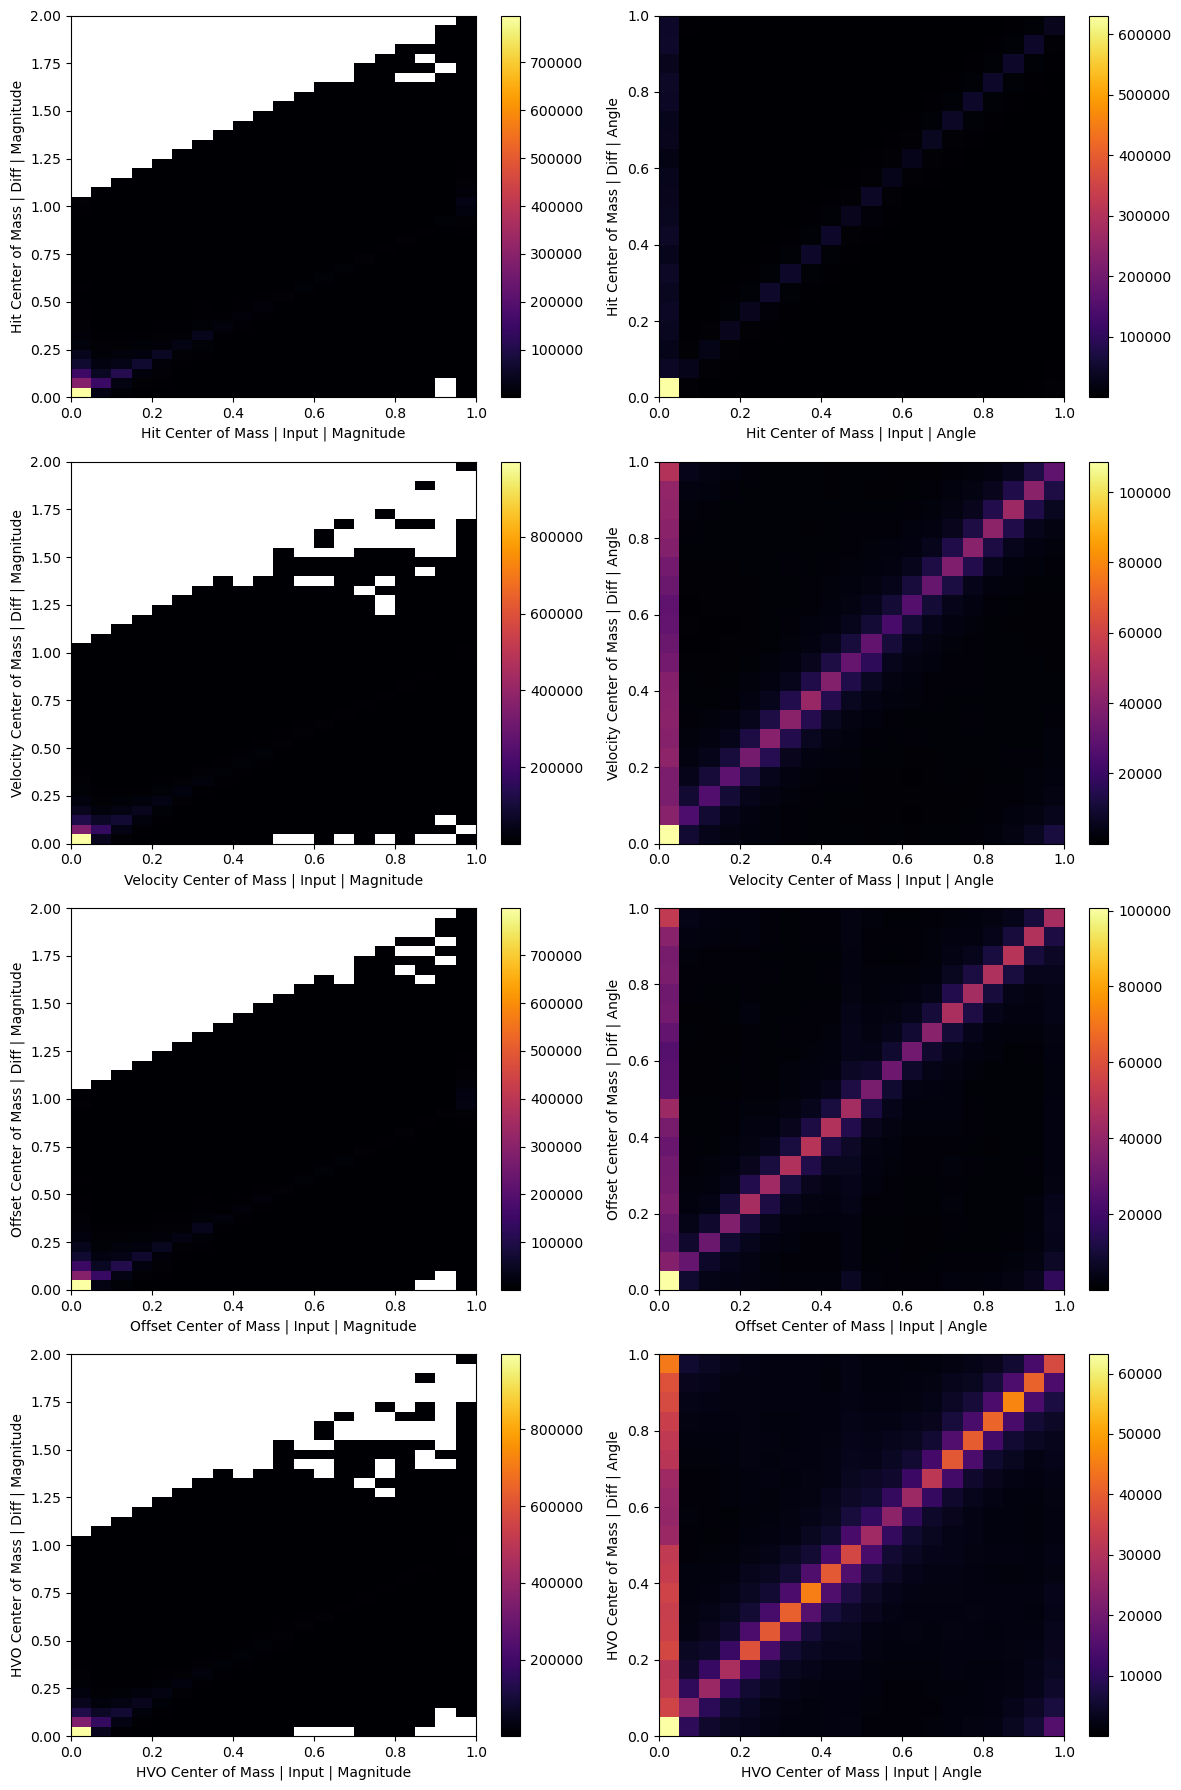

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# feature pairs
feature_pairs = [
    ("Hit Center of Mass | Input | Magnitude", "Hit Center of Mass | Diff | Magnitude"),
    ("Hit Center of Mass | Input | Angle", "Hit Center of Mass | Diff | Angle"),
    ("Velocity Center of Mass | Input | Magnitude", "Velocity Center of Mass | Diff | Magnitude"),
    ("Velocity Center of Mass | Input | Angle", "Velocity Center of Mass | Diff | Angle"),
    ("Offset Center of Mass | Input | Magnitude", "Offset Center of Mass | Diff | Magnitude"),
    ("Offset Center of Mass | Input | Angle", "Offset Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")
]

# make a copy of inferno colormap and set "under" (zero counts) to transparent
cmap = cm.get_cmap("inferno").copy()
cmap.set_under(color=(0, 0, 0, 0))  # RGBA: transparent

# plot 2 per row
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[i // 2, i % 2]

    x = features_all[k1]
    y = features_all[k2]

    # define bins with step size 0.05
    x_bins = np.arange(np.min(x), np.max(x) + 0.05, 0.05)
    y_bins = np.arange(np.min(y), np.max(y) + 0.05, 0.05)

    # use vmin>0 so that 0-count bins use "under" (transparent)
    h = ax.hist2d(x, y, bins=[x_bins, y_bins], cmap=cmap, vmin=0.1)

    # add colorbar
    fig.colorbar(h[3], ax=ax)

    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

plt.tight_layout()
plt.show()


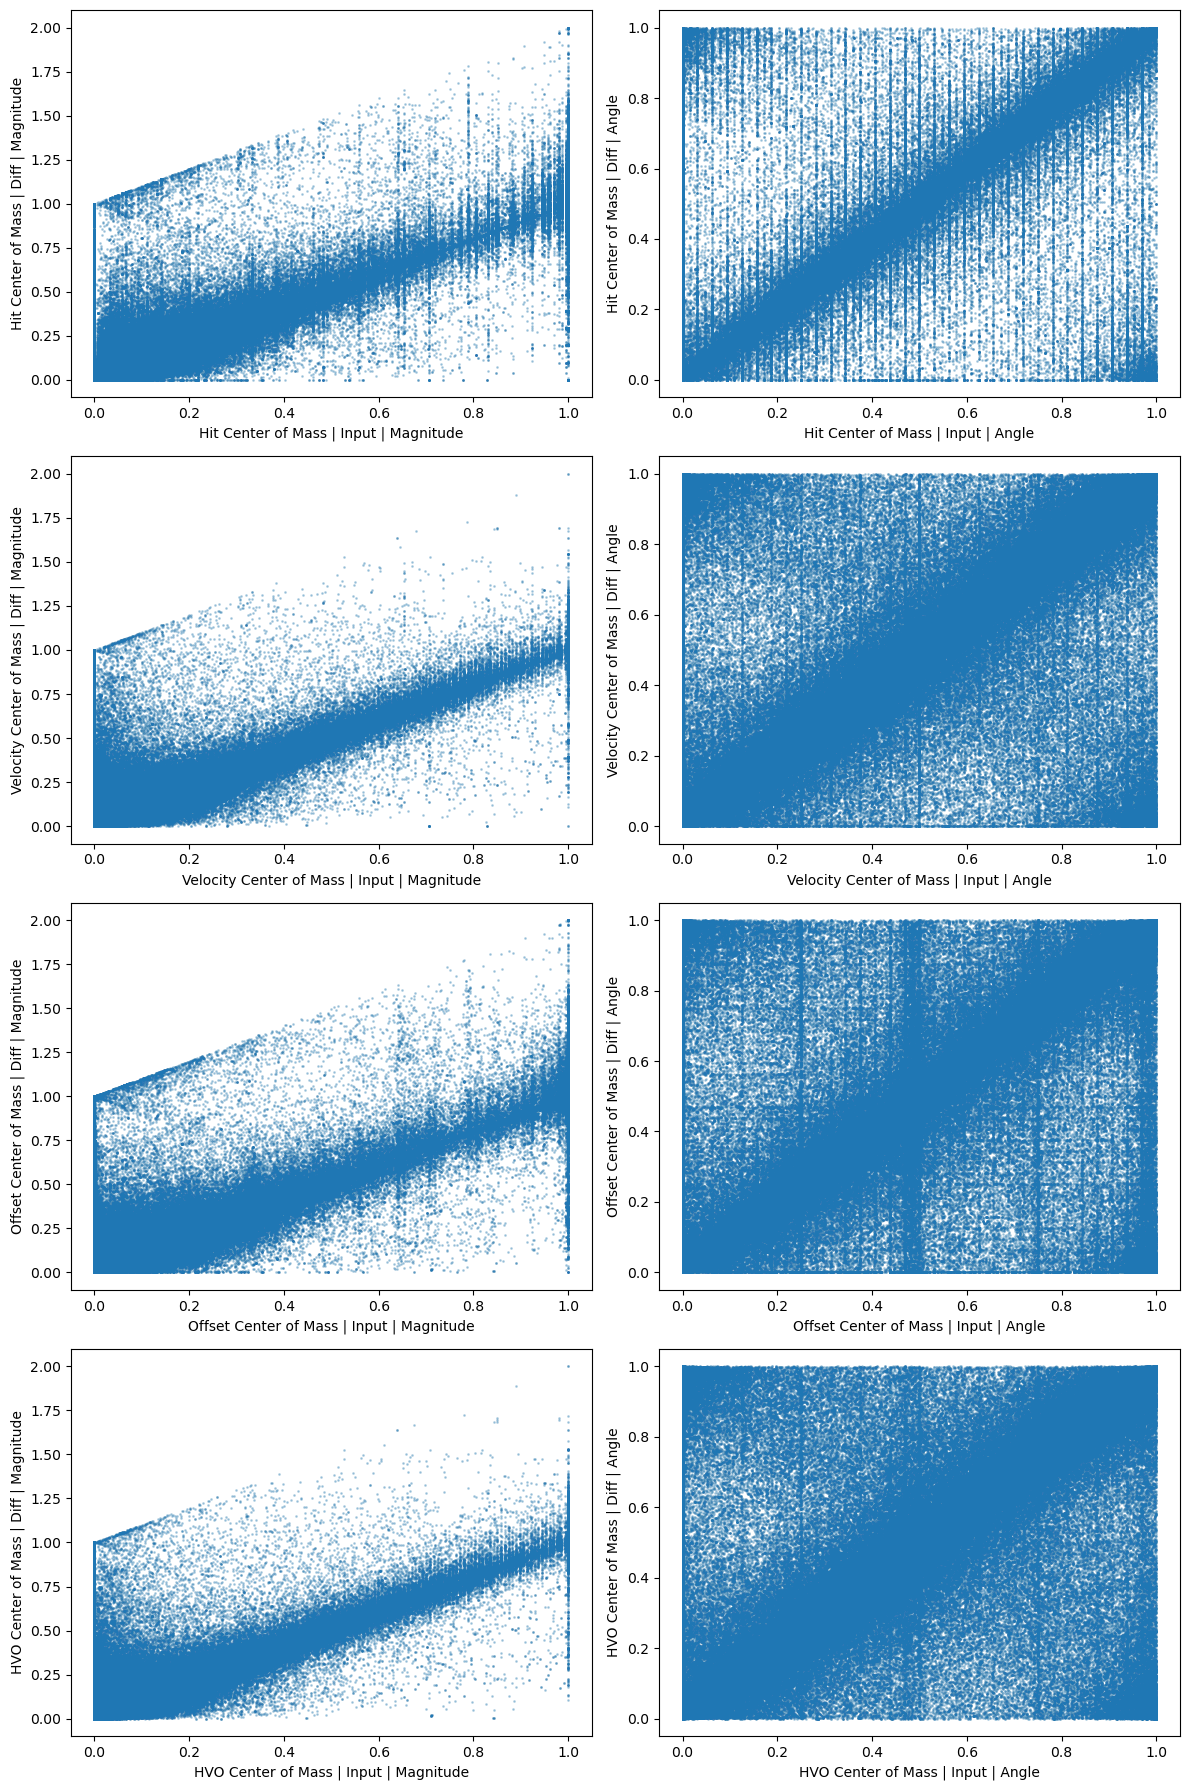

In [8]:
# "Hit Center of Mass | Input | Magnitude" vs "Hit Center of Mass | Output | Magnitude"

feature_pairs = [
    ("Hit Center of Mass | Input | Magnitude", "Hit Center of Mass | Diff | Magnitude"),
    ("Hit Center of Mass | Input | Angle", "Hit Center of Mass | Diff | Angle"),
    ("Velocity Center of Mass | Input | Magnitude", "Velocity Center of Mass | Diff | Magnitude"),
    ("Velocity Center of Mass | Input | Angle", "Velocity Center of Mass | Diff | Angle"),
    ("Offset Center of Mass | Input | Magnitude", "Offset Center of Mass | Diff | Magnitude"),
    ("Offset Center of Mass | Input | Angle", "Offset Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")
]

# plot 2 per row
fig, axs = plt.subplots(4, 2, figsize=(12, 18))
for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[i // 2, i % 2]
    ax.scatter(features_all[k1], features_all[k2], alpha=0.05, s=1)
    ax.set_xlabel(k1)
    ax.set_ylabel(k2)
plt.tight_layout()
plt.show()






/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_69313/3456495701.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("inferno").copy()
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35bd5e640>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35bd84eb0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35bdb38b0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35bdde370>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35be06a90>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35be34550>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35be600a0>
DEBUG:matplotlib.colorbar:locator

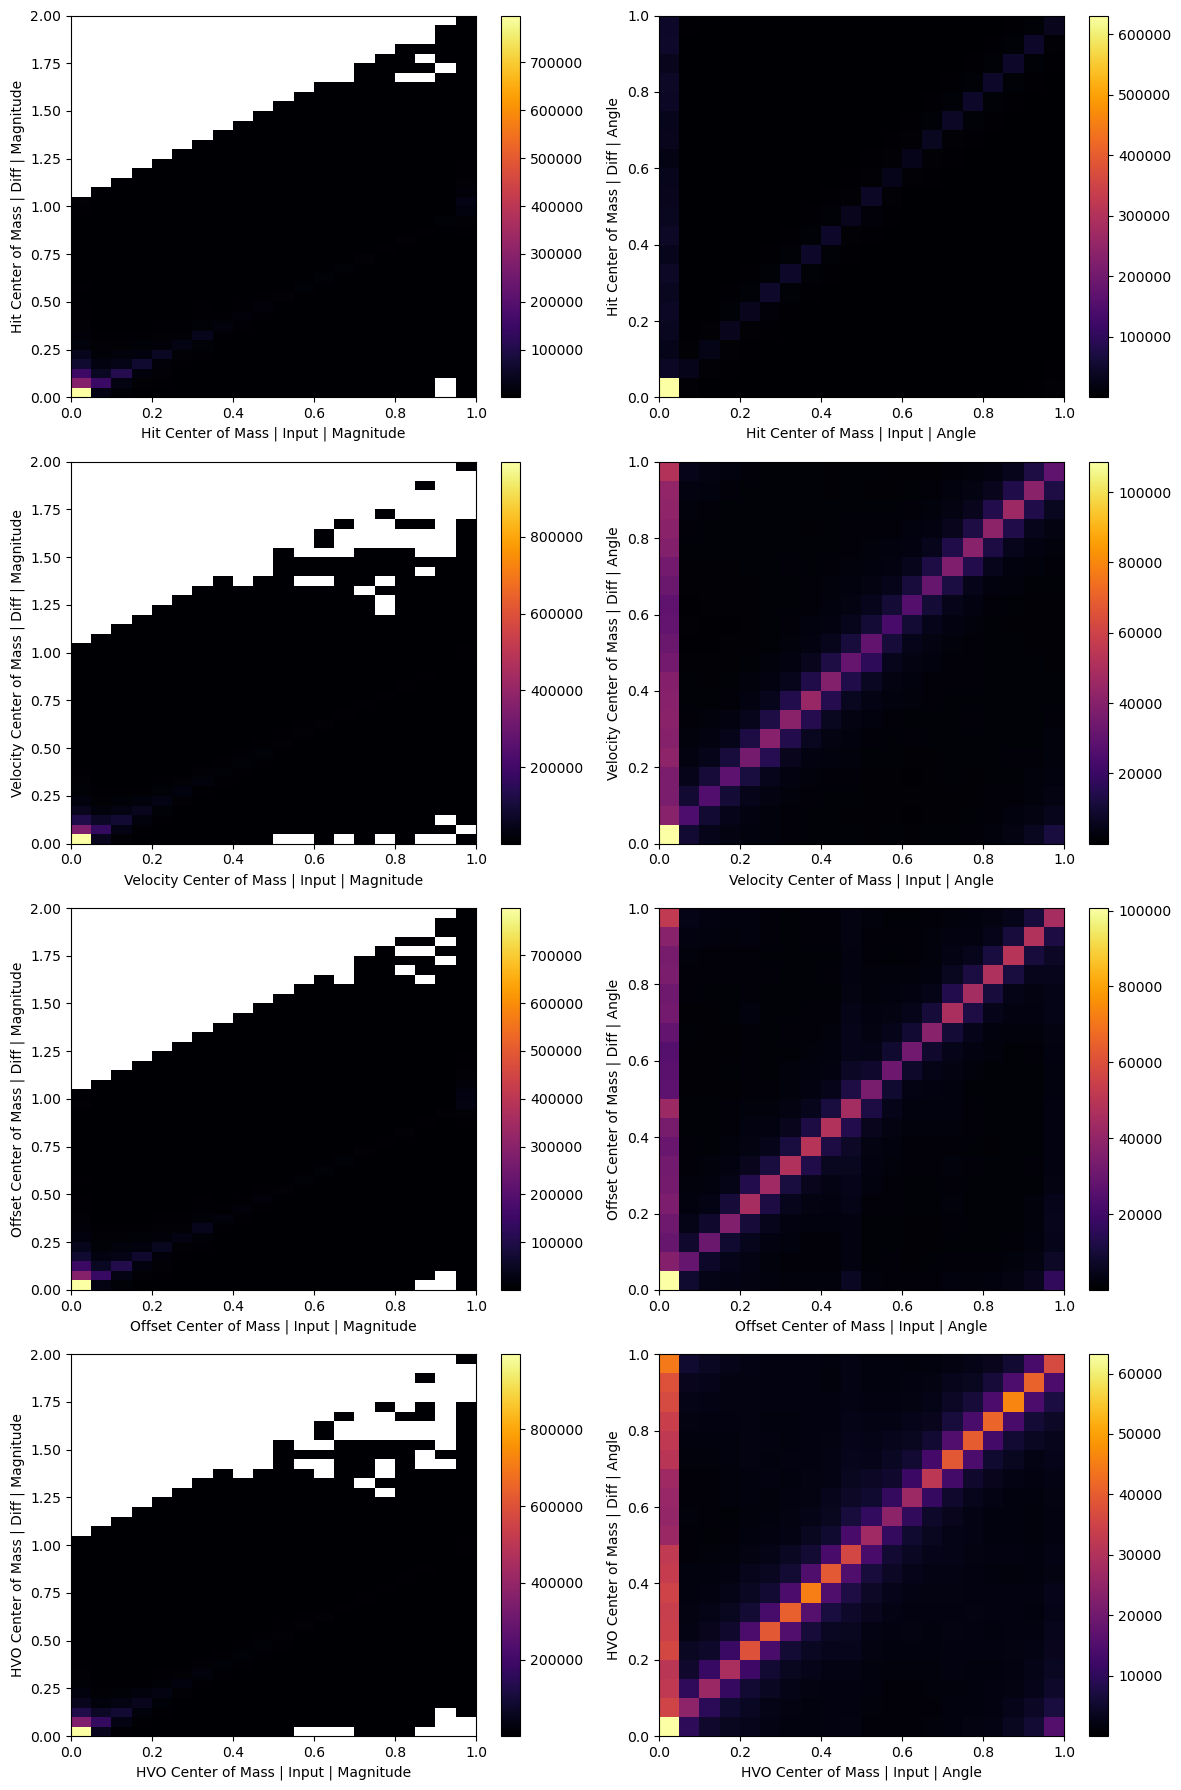

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# feature pairs
feature_pairs = [
    ("Hit Center of Mass | Input | Magnitude", "Hit Center of Mass | Diff | Magnitude"),
    ("Hit Center of Mass | Input | Angle", "Hit Center of Mass | Diff | Angle"),
    ("Velocity Center of Mass | Input | Magnitude", "Velocity Center of Mass | Diff | Magnitude"),
    ("Velocity Center of Mass | Input | Angle", "Velocity Center of Mass | Diff | Angle"),
    ("Offset Center of Mass | Input | Magnitude", "Offset Center of Mass | Diff | Magnitude"),
    ("Offset Center of Mass | Input | Angle", "Offset Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")
]

# make a copy of inferno colormap and set "under" (zero counts) to transparent
cmap = cm.get_cmap("inferno").copy()
cmap.set_under(color=(0, 0, 0, 0))  # RGBA: transparent

# plot 2 per row
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[i // 2, i % 2]

    x = features_all[k1]
    y = features_all[k2]

    # define bins with step size 0.05
    x_bins = np.arange(np.min(x), np.max(x) + 0.05, 0.05)
    y_bins = np.arange(np.min(y), np.max(y) + 0.05, 0.05)

    # use vmin>0 so that 0-count bins use "under" (transparent)
    h = ax.hist2d(x, y, bins=[x_bins, y_bins], cmap=cmap, vmin=0.1)

    # add colorbar
    fig.colorbar(h[3], ax=ax)

    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

plt.tight_layout()
plt.show()


In [10]:
# let's redo previous without patterns that have either empty input or output

from data import FlexControlGroove2TripleStream2BarDataset

n_input_hits = dataset.input_grooves.cpu().numpy()[:, :, 0].sum(-1)
h_output_hits = dataset.flat_output_streams.cpu().numpy()[:, :, 0].sum(-1)
empty_in = np.argwhere(n_input_hits == 0)
empty_out = np.argwhere(n_input_hits == 1)

print(f"Ratio of empty inputs {len(empty_in)/len(dataset)} - Size: {len(empty_in)}")
print(f"Ratio of empty outputs {len(empty_out)/len(dataset)} - Size: {len(empty_out)}")
print(f"Ratio of either empty {len(np.unique(np.union1d(empty_in, empty_out)))/len(dataset)} - Size: {len(np.unique(np.union1d(empty_in, empty_out)))}")

Ratio of empty inputs 0.20764793736683487 - Size: 560578
Ratio of empty outputs 0.028326201560495114 - Size: 76471
Ratio of either empty 0.23597413892733 - Size: 637049


In [11]:
non_empty_in = np.argwhere(n_input_hits != 0)

non_empty_in_features_all = FlexControlGroove2TripleStream2BarDataset.extract_features_dict(
    {
        "input_hvos": dataset.input_grooves.cpu().numpy()[non_empty_in, :, :][:, 0, :, :],
        "output_hvos": dataset.output_streams.cpu().numpy()[non_empty_in, :, :][:, 0, :, :],
        "flat_out_hvos": dataset.flat_output_streams.cpu().numpy()[non_empty_in, :, :][:, 0, :, :],
    },
)

/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_69313/1534203159.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("inferno").copy()
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x148272df0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x343216040>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3431f8760>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3431d7af0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3431b9490>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x34319b8b0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x343185610>
DEBUG:matplotlib.colorbar:locator

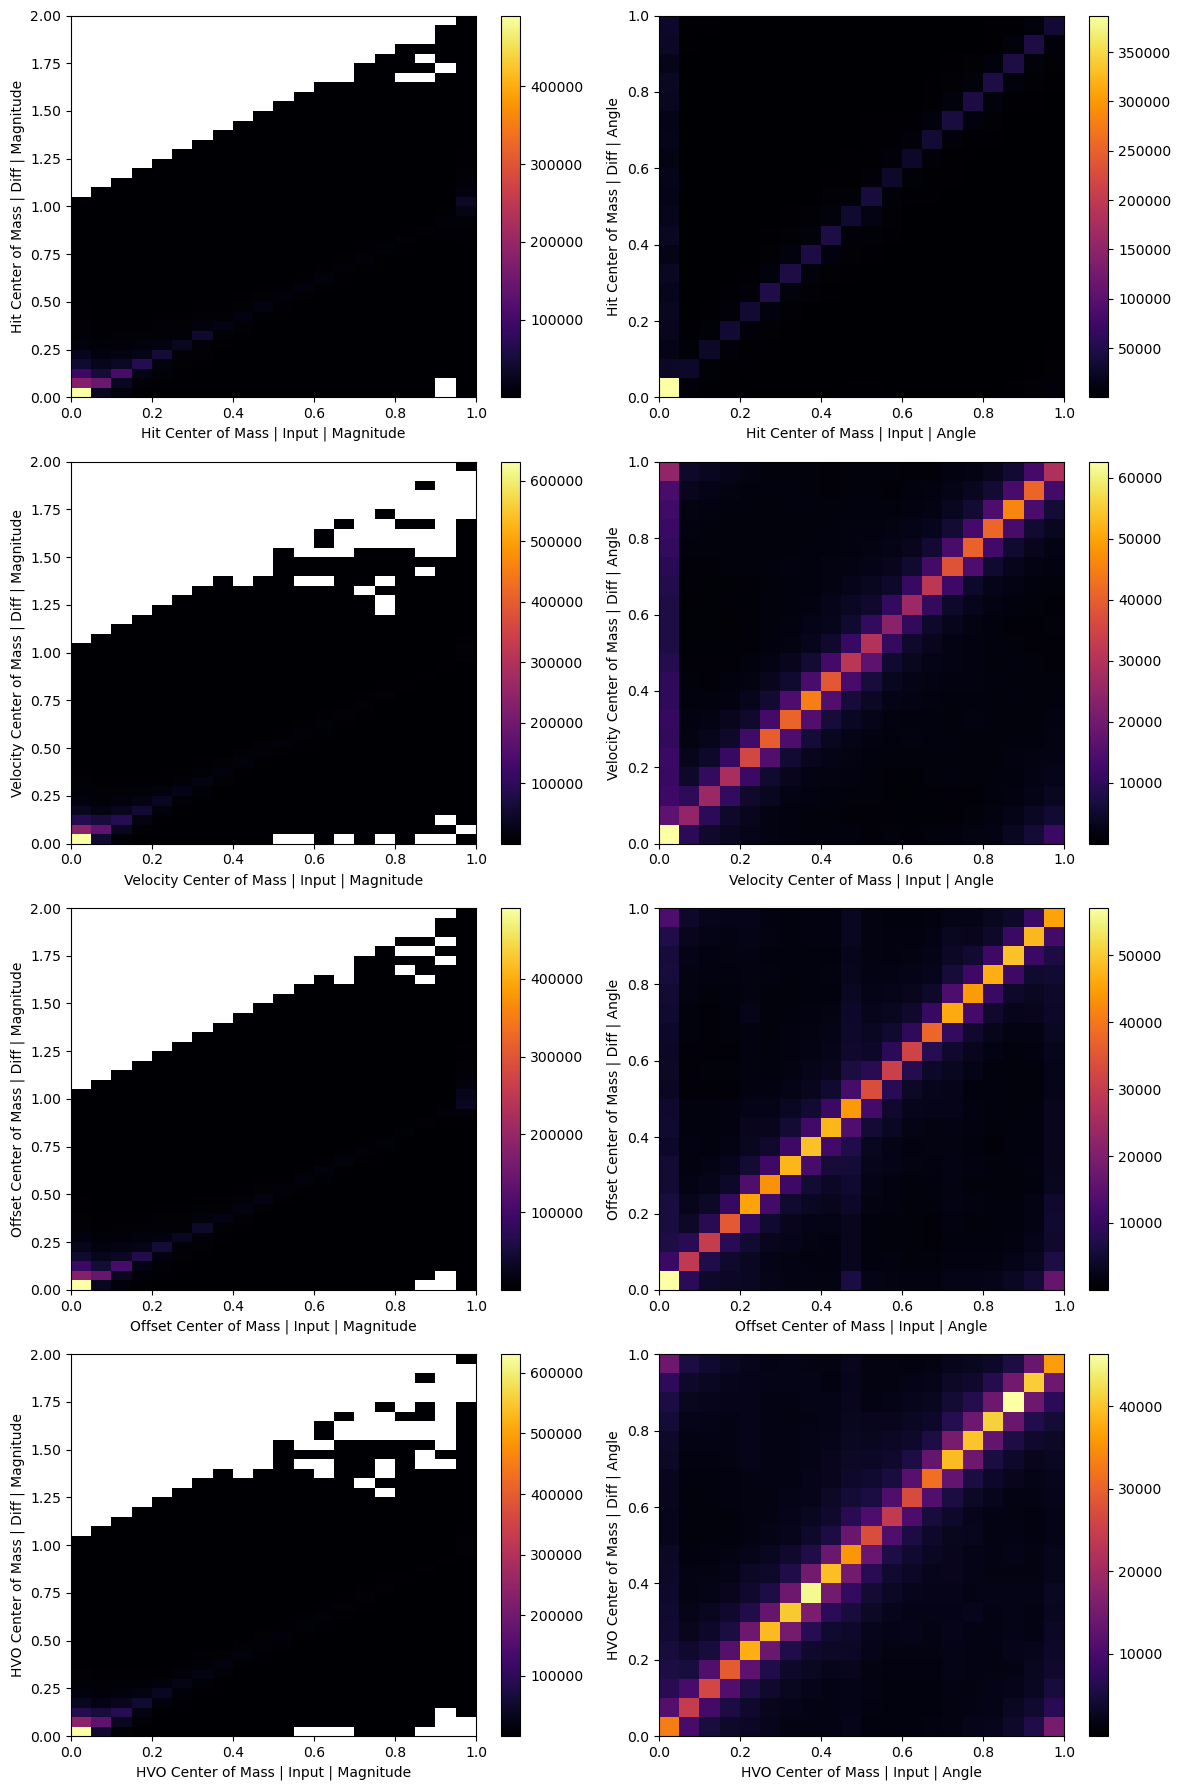

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# feature pairs
feature_pairs = [
    ("Hit Center of Mass | Input | Magnitude", "Hit Center of Mass | Diff | Magnitude"),
    ("Hit Center of Mass | Input | Angle", "Hit Center of Mass | Diff | Angle"),
    ("Velocity Center of Mass | Input | Magnitude", "Velocity Center of Mass | Diff | Magnitude"),
    ("Velocity Center of Mass | Input | Angle", "Velocity Center of Mass | Diff | Angle"),
    ("Offset Center of Mass | Input | Magnitude", "Offset Center of Mass | Diff | Magnitude"),
    ("Offset Center of Mass | Input | Angle", "Offset Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")
]

# make a copy of inferno colormap and set "under" (zero counts) to transparent
cmap = cm.get_cmap("inferno").copy()
cmap.set_under(color=(0, 0, 0, 0))  # RGBA: transparent

# plot 2 per row
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[i // 2, i % 2]

    x = non_empty_in_features_all[k1]
    y = non_empty_in_features_all[k2]

    # define bins with step size 0.05
    x_bins = np.arange(np.min(x), np.max(x) + 0.05, 0.05)
    y_bins = np.arange(np.min(y), np.max(y) + 0.05, 0.05)

    # use vmin>0 so that 0-count bins use "under" (transparent)
    h = ax.hist2d(x, y, bins=[x_bins, y_bins], cmap=cmap, vmin=0.1)

    # add colorbar
    fig.colorbar(h[3], ax=ax)

    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

plt.tight_layout()
plt.show()


In [13]:
# let's redo previous without patterns that have either empty input or output

from data import FlexControlGroove2TripleStream2BarDataset

n_input_hits = dataset.input_grooves.cpu().numpy()[:, :, 0].sum(-1)
h_output_hits = dataset.flat_output_streams.cpu().numpy()[:, :, 0].sum(-1)

max_in_hits = np.argwhere(n_input_hits == 32)
max_out_hits = np.argwhere(h_output_hits == 32)
max_in_and_out_hits = np.argwhere((n_input_hits+h_output_hits) == 64)

print(f"{len(max_in_hits)/len(dataset)} samples have fully active inputs - Size: {len(max_in_hits)}")
print(f"{len(max_out_hits)/len(dataset)} samples have fully active outputs - Size: {len(max_out_hits)}")
print(f"{len(max_in_and_out_hits)/len(dataset)} samples have fully active inputs and outputs - Size: {len(max_in_and_out_hits)}")




0.04623737246523261 samples have fully active inputs - Size: 124825
0.14490290614804258 samples have fully active outputs - Size: 391188
0.01028575492581277 samples have fully active inputs and outputs - Size: 27768


In [14]:
# Let's plot only the ones with fully active inputs and outputs
indices = max_in_hits.squeeze().tolist()
# indices.extend(max_out_hits.squeeze().tolist())
indices = list(set(indices))

# non_empty_in = np.argwhere(n_input_hits != 0)

full_active_in_or_out_features = FlexControlGroove2TripleStream2BarDataset.extract_features_dict(
    {
        "input_hvos": dataset.input_grooves.cpu().numpy()[indices, :, :],
        "output_hvos": dataset.output_streams.cpu().numpy()[indices, :, :],
        "flat_out_hvos": dataset.flat_output_streams.cpu().numpy()[indices, :, :],
    },
)

/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_69313/734838897.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("inferno").copy()
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x305ae5760>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x305b11220>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x305b3b9d0>


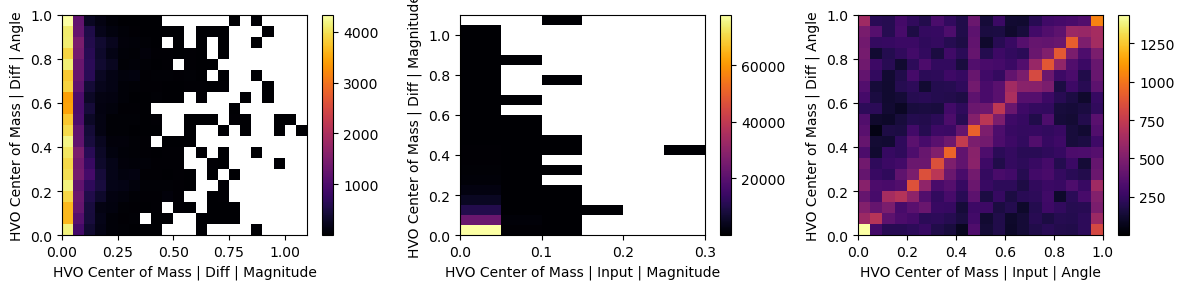

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# feature pairs
feature_pairs = [
    ("HVO Center of Mass | Diff | Magnitude", "HVO Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")

]

# make a copy of inferno colormap and set "under" (zero counts) to transparent
cmap = cm.get_cmap("inferno").copy()
cmap.set_under(color=(0, 0, 0, 0))  # RGBA: transparent

# plot 2 per row
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[ i % 3]

    x = full_active_in_or_out_features[k1]
    y = full_active_in_or_out_features[k2]

    # define bins with step size 0.05
    x_bins = np.arange(np.min(x), np.max(x) + 0.05, 0.05)
    y_bins = np.arange(np.min(y), np.max(y) + 0.05, 0.05)

    # use vmin>0 so that 0-count bins use "under" (transparent)
    h = ax.hist2d(x, y, bins=[x_bins, y_bins], cmap=cmap, vmin=0.1)

    # add colorbar
    fig.colorbar(h[3], ax=ax)

    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

plt.tight_layout()
plt.show()


In [25]:
# patterns that input hits are exactly same as output hits
# let's redo previous without patterns that have either empty input or output

input_hits = dataset.input_grooves.cpu().numpy()[:, :, 0]
output_hits = dataset.flat_output_streams.cpu().numpy()[:, :, 0]

mask = np.all(input_hits == output_hits, axis=-1)  # shape [batch, length]
indices = np.argwhere(mask).squeeze()

print(f"{len(indices)} samples have matching grooves")

equal_i_o_hits_features = FlexControlGroove2TripleStream2BarDataset.extract_features_dict(
    {
        "input_hvos": dataset.input_grooves.cpu().numpy()[indices, :, :],
        "output_hvos": dataset.output_streams.cpu().numpy()[indices, :, :],
        "flat_out_hvos": dataset.flat_output_streams.cpu().numpy()[indices, :, :],
    },
)

86770 samples have matching grooves


/var/folders/lr/8ctpqx7n6m54ydpt525nf6q80000gn/T/ipykernel_69313/2402148336.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("inferno").copy()
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x3c66f3bb0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x35b9a70d0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x305902ac0>


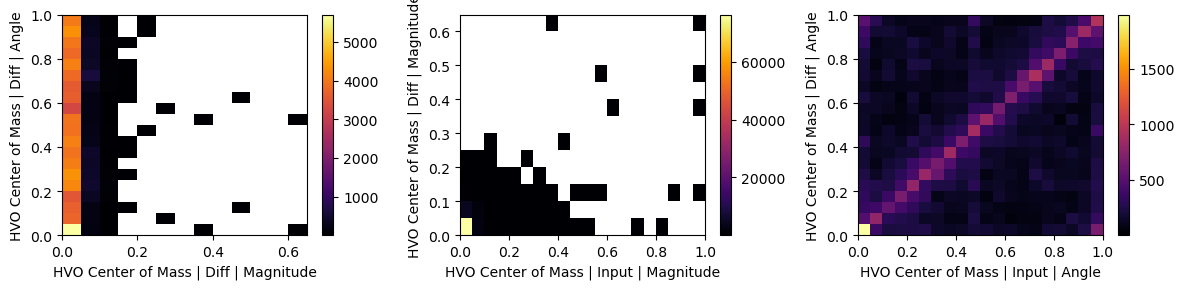

In [26]:

# feature pairs
feature_pairs = [
    ("HVO Center of Mass | Diff | Magnitude", "HVO Center of Mass | Diff | Angle"),
    ("HVO Center of Mass | Input | Magnitude", "HVO Center of Mass | Diff | Magnitude"),
    ("HVO Center of Mass | Input | Angle", "HVO Center of Mass | Diff | Angle")

]

# make a copy of inferno colormap and set "under" (zero counts) to transparent
cmap = cm.get_cmap("inferno").copy()
cmap.set_under(color=(0, 0, 0, 0))  # RGBA: transparent

# plot 2 per row
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, (k1, k2) in enumerate(feature_pairs):
    ax = axs[ i % 3]

    x = equal_i_o_hits_features[k1]
    y = equal_i_o_hits_features[k2]

    # define bins with step size 0.05
    x_bins = np.arange(np.min(x), np.max(x) + 0.05, 0.05)
    y_bins = np.arange(np.min(y), np.max(y) + 0.05, 0.05)

    # use vmin>0 so that 0-count bins use "under" (transparent)
    h = ax.hist2d(x, y, bins=[x_bins, y_bins], cmap=cmap, vmin=0.1)

    # add colorbar
    fig.colorbar(h[3], ax=ax)

    ax.set_xlabel(k1)
    ax.set_ylabel(k2)

plt.tight_layout()
plt.show()
